# Résultats des analyses sur la campagne visite 2 pages 2 de l'annonceur 1

Nous présentons ici les résultats graphiques et leur analyse pour la campagne mentionnée.

In [1]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import testZ, proportions, testZ_cum
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [2]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign2_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)

#### Analyse du taux de conversion journalier des versions A et B de la bannière en tant que série temporelle

In [3]:
#préparation des données
dataA, dataB = preparer(data) 

Conversion des index en dates
Moyennes des taux par jour et séparation en deux groupes A et B


In [4]:
#moyenne des taux de conversion des deux versions
print(data.groupby('group')['is_conv'].mean())

group
A    0.002776
B    0.003369
Name: is_conv, dtype: float64


Est-ce qu'il y a un pattern (journalier, hebdomadaire, mensuel, ...) dans le taux de conversion ou la différence relative de taux de conversion ? On ajoutera aussi le nombre total de conversions pour la fréquence donnée afin de savoir si une importante différence relative est significative ou pas (si c'est 100% mais pour un 1 vs 2 par exemple).

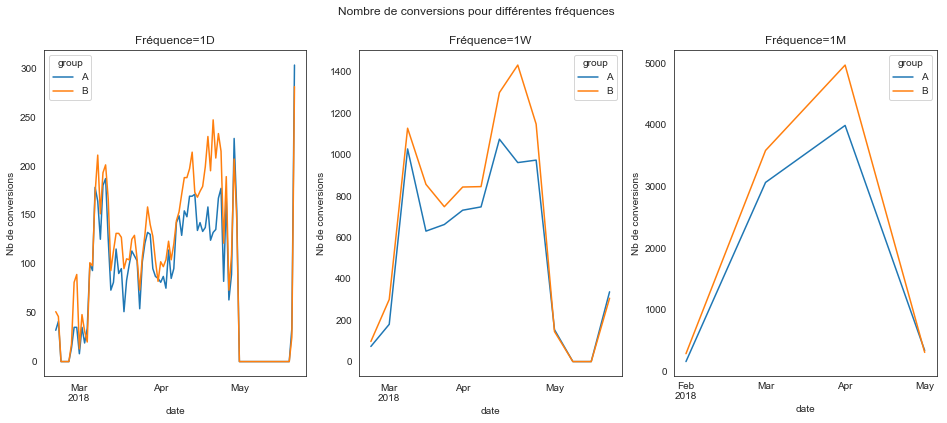

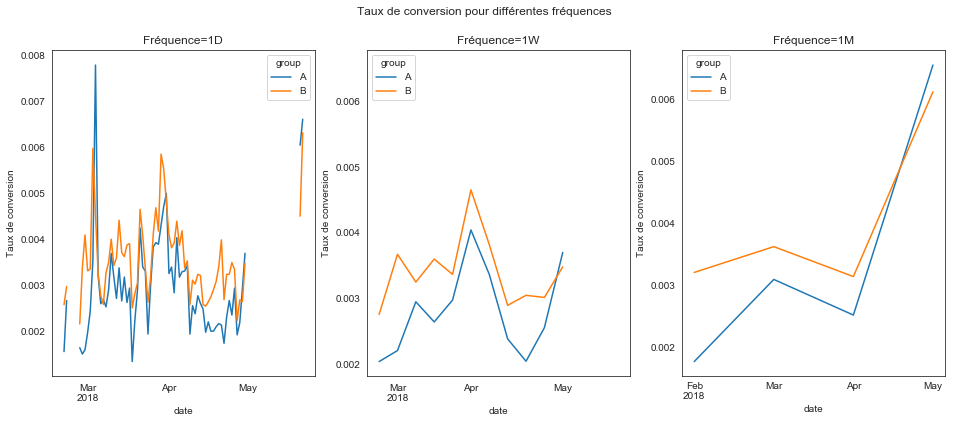

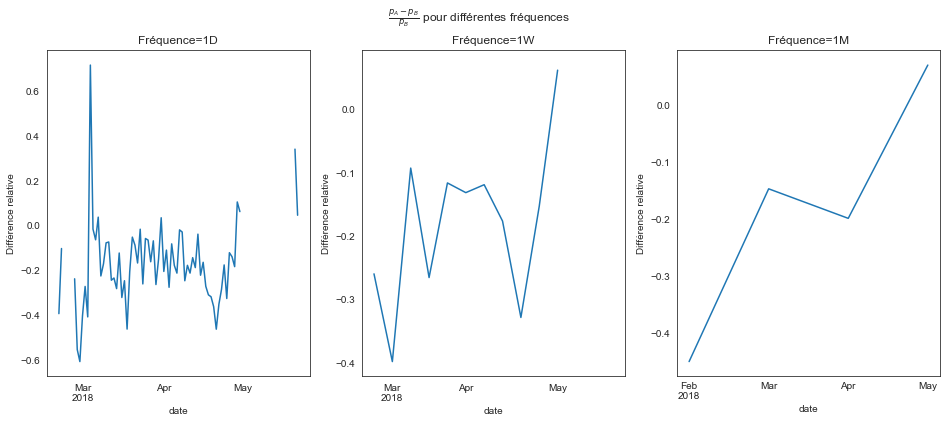

In [6]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]
    # attention il y a des NaN quand il y a pas de conversion du groupe B

# trace des taux de conversion pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    conv_count[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Nb de conversions')
plt.suptitle('Nombre de conversions pour différentes fréquences')
plt.show()

# trace des taux de conversion pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    conv_rate[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Taux de conversion')
plt.suptitle('Taux de conversion pour différentes fréquences')
plt.show()

# trace des variations relatives pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

On remarque clairement à travers les différentes échelles que la version B amène plus de conversion que la A.

De plus, le changement de fréquence permet un lissage des données avec moins de variance.

### Version A

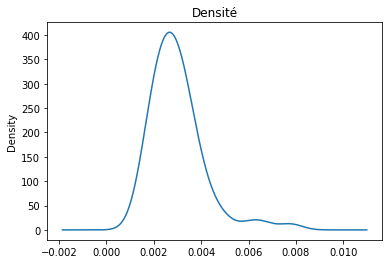

## Analyse classique d'une ST

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


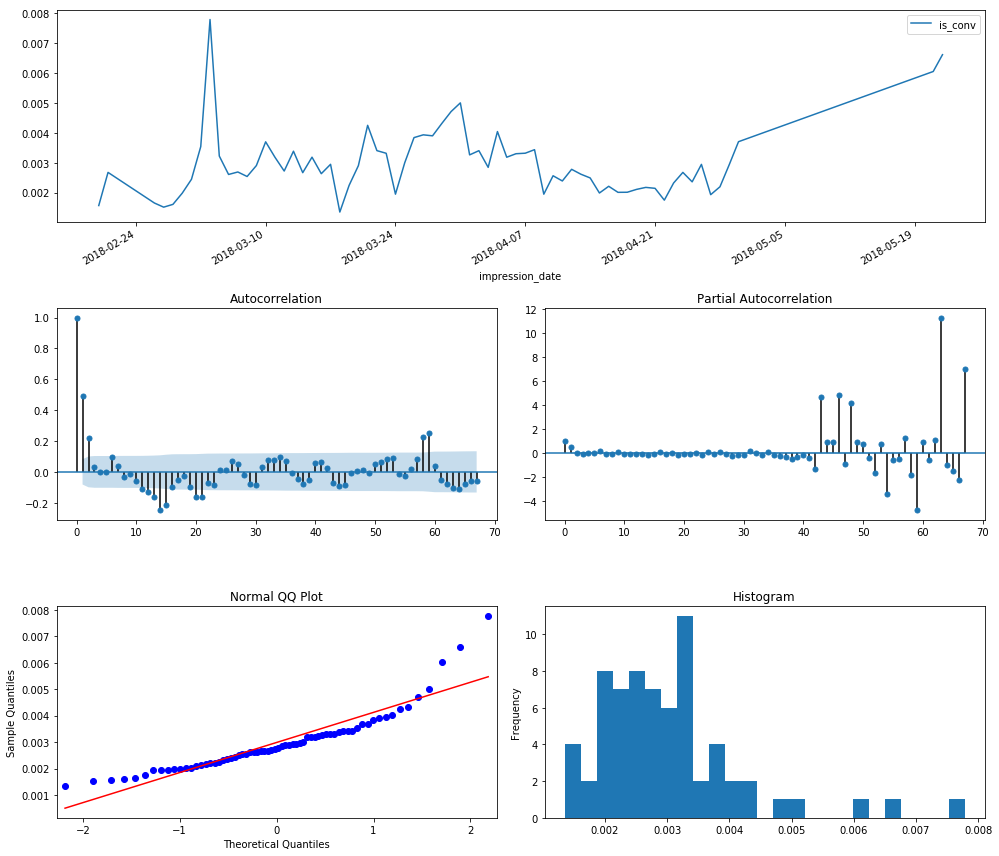

## Effet journalier

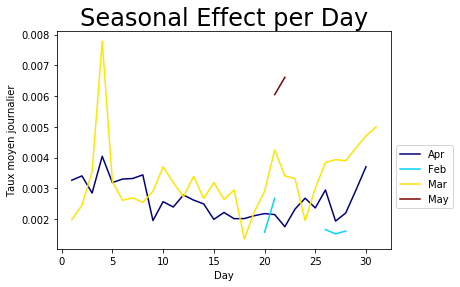

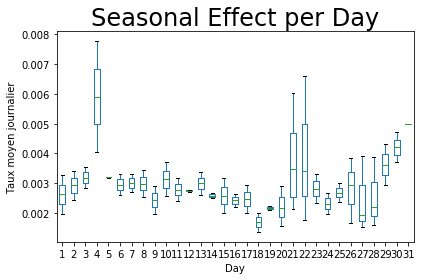

## Décomposition de la série de temps selon modèle multiplicatif

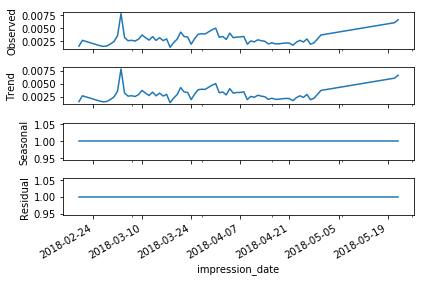

## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-3.734207
p-value,0.003657
# of lags,0.000000
# of observations,67.000000
Critical Value (1%),-3.531955
Critical Value (5%),-2.905755
Critical Value (10%),-2.590357


In [4]:
#Analyse temporelle du taux de conversion journalier A
analyser(dataA)

##### Analyse des résultats obtenus sur la version A du taux de conversion journalier:
+ L'histogramme et la densité indiquent un taux de conversion journalier pour la version A qui se situe majoritairement entre 0.001 et 0.004, qui sont de très faibles valeurs: il y a donc en moyenne très peu de conversions.
+ Le tracé de la série des taux journaliers montre un pic sur un jour et une augmentation du taux à partir de fin avril.
+ La fonction d'autocorrélation peut nous faire penser à un modèle MA(3) par sa brusque décroissance après lag 3.
+ Les graphiques des effets saisonniers par jour mettent en avant le pic observé sur le tracé de la série. On peut égaelement noter un effet journalier sur les jours de fin de mois où les taux augmentent quelque peu.
+ La décomposition de la série temporelle ne révèle cependant pas d'effet de saison.
+ Test de Dickey-Fuller indique que la série n'est pas stationnaire car la statistique de test est plus élevée que la valeur critique à 1%. On réalise donc une tranformation sur la série pour la rendre stationnaire.

Différencier à l'ordre 1: y_t - y_[t-1]
Analyse après transformation



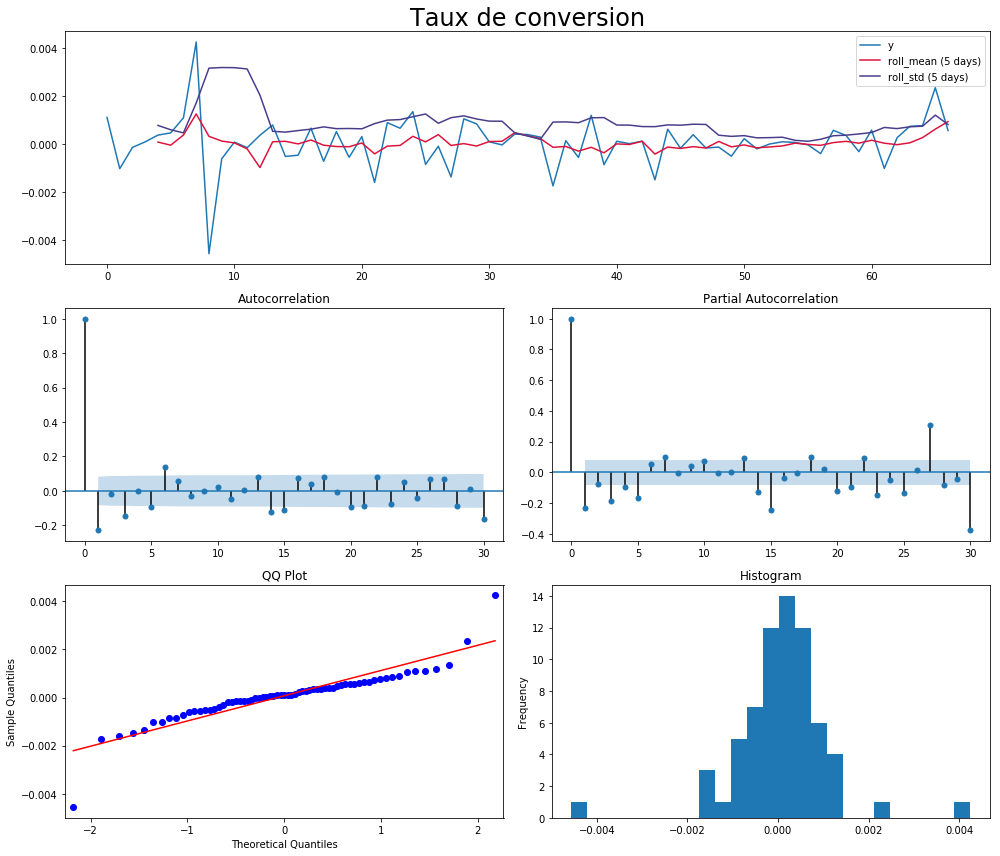

,Results of Augmented Dickey-Fuller test:
test statistic,-5.826112e+00
p-value,4.075726e-07
# of lags,2.000000e+00
# of observations,6.400000e+01
Critical Value (1%),-3.536928e+00
Critical Value (5%),-2.907887e+00
Critical Value (10%),-2.591493e+00


In [5]:
transformer(dataA,"diff1")

Après différenciation, la série est stationnaire d'après le test de Dickey-Fuller. Les tracés de la séries et des fonctions ACF et PACF le prouvent également: moyenne nulle et valeurs des fonctions quasi nulles après le lag 0.

### Version B

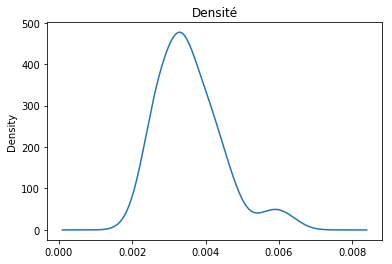

## Analyse classique d'une ST

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


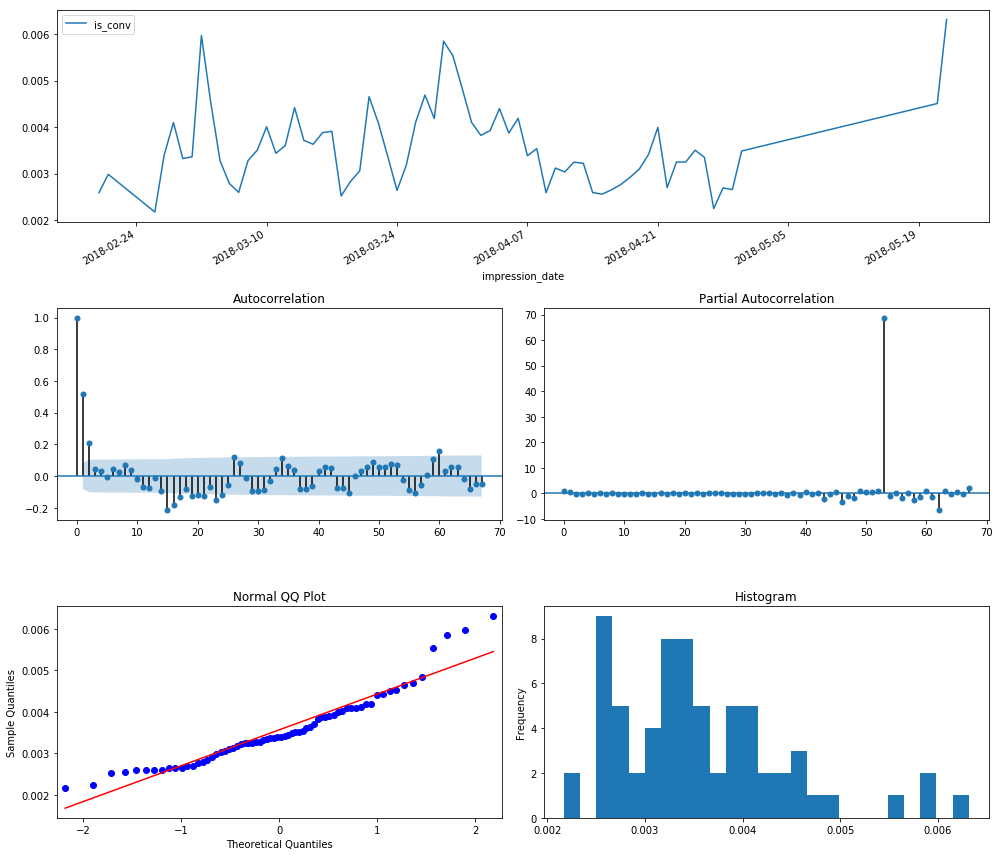

## Effet journalier

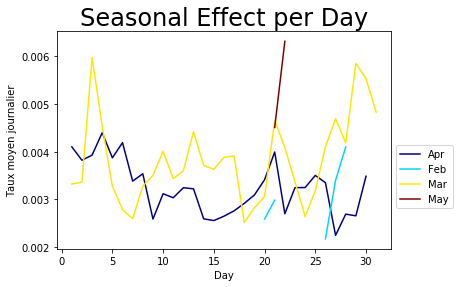

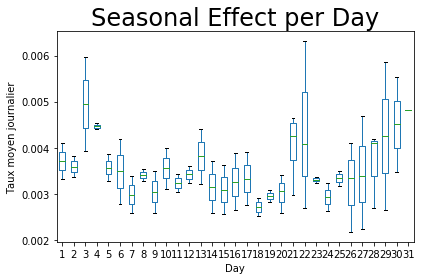

## Décomposition de la série de temps selon modèle multiplicatif

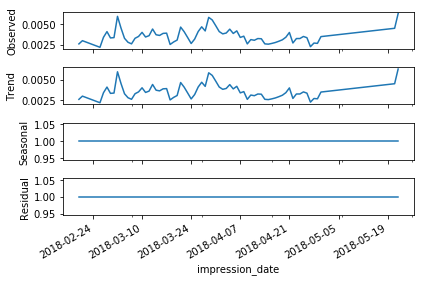

## Test de Dickey-Fuller

,Results of Augmented Dickey-Fuller test:
test statistic,-3.526216
p-value,0.007339
# of lags,0.000000
# of observations,67.000000
Critical Value (1%),-3.531955
Critical Value (5%),-2.905755
Critical Value (10%),-2.590357


In [6]:
#analyse temporelle du taux de conversion B
analyser(dataB)

##### Analyse des résultats obtenus sur la version B du taux de conversion journalier:
+ L'histogramme et la densité indiquent un taux de conversion journalier pour la version B qui se situe majoritairement entre 0.001 et 0.0045, qui sont de très faibles valeurs: il y a donc en moyenne très peu de conversions. Cependant, ces taux semblent légèrement plus élevés que pour la version A.
+ Le tracé de la série des taux journaliers montre deux pics et une augmentation du taux à partir de fin avril, comme pour la verison A.
+ La fonction d'autocorrélation peut nous faire penser à un modèle MA(3) par sa brusque décroissance après lag 3.
+ Les graphiques des effets saisonniers par jour mettent en avant le pic observé sur le tracé de la série. On peut également noter un effet journalier sur les jours de fin de mois où les taux augmentent, plus que pour la version A.
+ La décomposition de la série temporelle ne révèle cependant pas d'effet de saison.
+ Test de Dickey-Fuller indique que la série n'est pas stationnaire car la statistique de test est plus élevée que la valeur critique à 1%. On réalise donc une tranformation sur la série pour la rendre stationnaire.

Différencier à l'ordre 1: y_t - y_[t-1]
Analyse après transformation



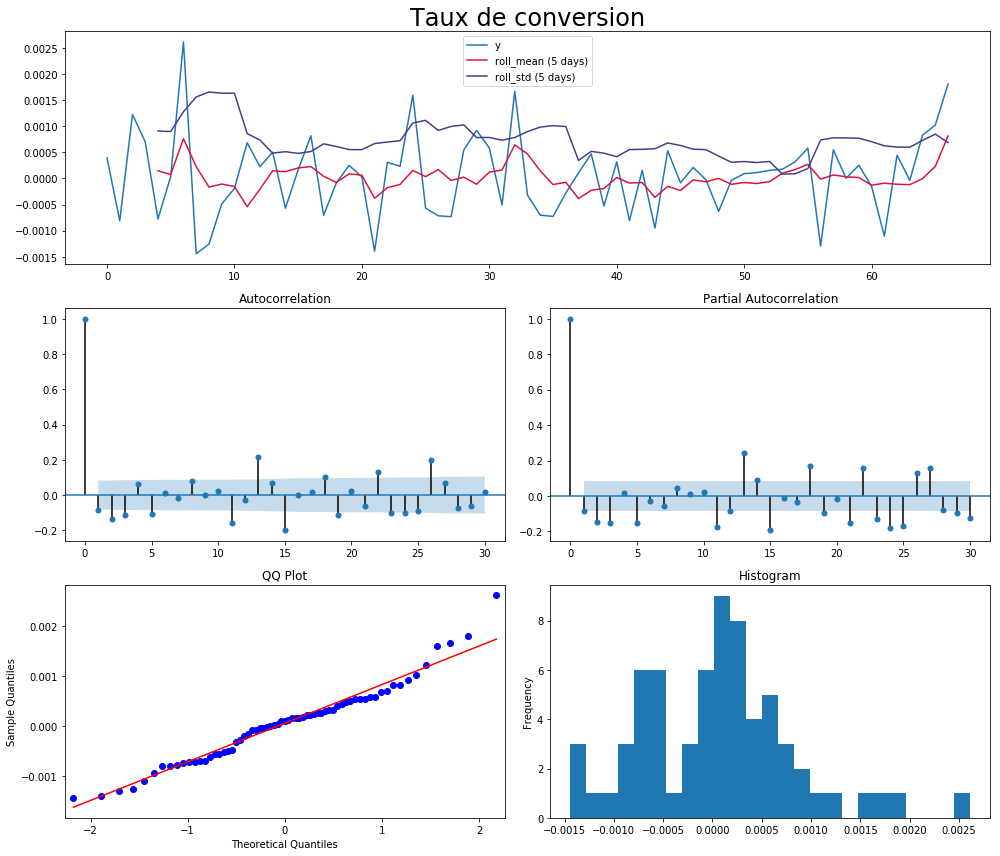

,Results of Augmented Dickey-Fuller test:
test statistic,-5.582174
p-value,0.000001
# of lags,2.000000
# of observations,64.000000
Critical Value (1%),-3.536928
Critical Value (5%),-2.907887
Critical Value (10%),-2.591493


In [7]:
transformer(dataB,"diff1")

Après différenciation, la série est stationnaire d'après le test de Dickey-Fuller. Les tracés de la séries et des fonctions ACF et PACF le prouvent également: moyenne nulle et valeurs des fonctions quasi nulles après le lag 0.

### Test Z

Enfin, on réalise un test Z sur les données ave H0 "les taux de conversion A et B sont similaires". Le test nous donnera une statistique qui nous permettra de calculer la p-valeur i.e. la probabilité de rejeter l'hypothèse nulle H0.

In [8]:
testZ(data)

(-12.480433060374452, 0.0)

Nous avons ici: Zstat = -12.4 et Prej = 0.0. On peut donc rejeter l'hypothèse nulle: les taux de conversion sont différents, il y a bien une version plus efficace que l'autre en termes de taux de conversion journalier. La version B semble la meilleure d'après les analyses précédentes. 

In [7]:
Z_cum, P_rej, p_cum = testZ_cum(data)

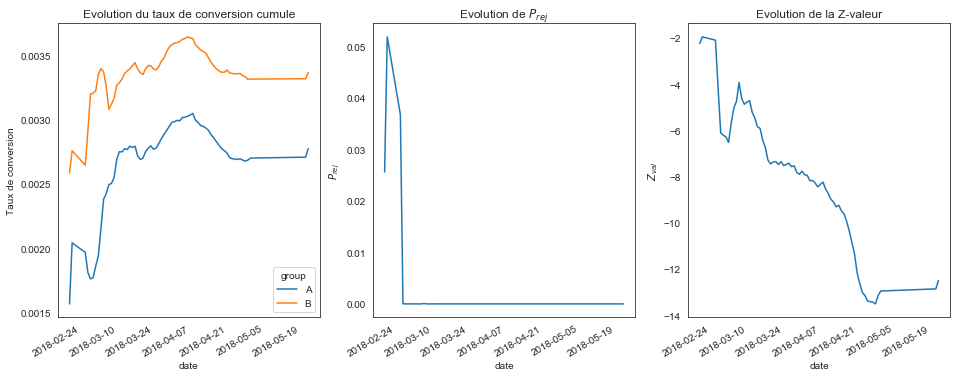

In [10]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
p_cum.plot(title="Evolution du taux de conversion cumule", ax=plt.gca())
plt.ylabel("Taux de conversion")

plt.subplot(1, 3, 2)
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')

plt.subplot(1, 3, 3)
Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')

plt.show();

In [9]:
print("P_rej")
print(P_rej.describe())

print("Z_cum")
print(Z_cum.describe())

P_rej
count    6.800000e+01
mean     1.685823e-03
std      8.217987e-03
min      0.000000e+00
25%      0.000000e+00
50%      7.216450e-15
75%      6.975100e-10
max      5.196595e-02
Name: P_rej, dtype: float64
Z_cum
count    68.000000
mean     -8.103844
std       2.962067
min     -13.493204
25%      -9.498823
50%      -7.782701
75%      -6.173767
max      -1.943416
dtype: float64


Les résultats du test Z cumulé montre une convergence vers le rejet de H0 rapidement (Prej = 0), ce qui confirme la supériorité de la bannière B quelle que soit la période de temps considérée.